In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

%matplotlib inline


In [2]:
df =pd.read_csv('500209.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5296 non-null   object 
 1   Open Price                 5296 non-null   float64
 2   High Price                 5296 non-null   float64
 3   Low Price                  5296 non-null   float64
 4   Close Price                5296 non-null   float64
 5   WAP                        5296 non-null   float64
 6   No.of Shares               5296 non-null   int64  
 7   No. of Trades              5296 non-null   int64  
 8   Total Turnover (Rs.)       5296 non-null   float64
 9   Deliverable Quantity       4792 non-null   float64
 10  % Deli. Qty to Traded Qty  4792 non-null   float64
 11  Spread High-Low            5296 non-null   float64
 12  Spread Close-Open          5296 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [3]:
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.head()


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-04,1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80
2021-06-03,1382.00,1398.65,1377.2,1389.50,1386.545266,243404,12798,3.374907e+08,103459.0,42.50,21.45,7.50
2021-06-02,1378.65,1392.00,1362.2,1379.75,1366.888615,1906584,31599,2.606088e+09,1441943.0,75.63,29.80,1.10
2021-06-01,1400.00,1400.80,1378.6,1387.40,1385.129123,184134,7222,2.550494e+08,90643.0,49.23,22.20,-12.60
2021-05-31,1405.00,1405.00,1383.1,1393.65,1391.983909,1009210,12189,1.404804e+09,813022.0,80.56,21.90,-11.35


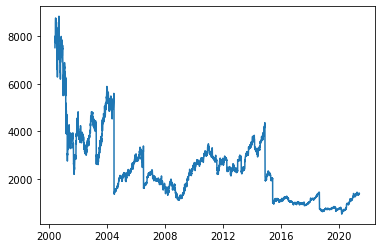

In [4]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
df.tail()
plt.plot(df.index,df['Target'])

In [5]:
print(df.shape)
df_m=df
df_m=df_m.dropna()
df_m.shape

(5296, 13)


(4791, 13)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.1)

In [7]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [8]:
model1.score(x_test,y_test)

0.9979765913932998

In [9]:
# To predict 5-6-21
model1.predict([[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])

array([1387.82858578])

In [10]:
pred_y=model1.predict(x_test)
mean_squared_error(y_test,pred_y,squared=False)

50.36821207619025

In [11]:
mean_squared_error(y_test,pred_y)

2536.9567877520767

In [12]:
mean_absolute_error(y_test,pred_y)

30.441863281786006

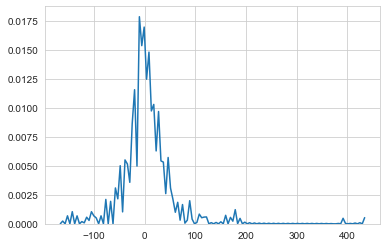

In [13]:

delta_y = y_test-pred_y;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

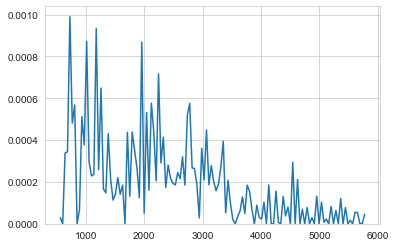

In [14]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=0.5)
plt.show()

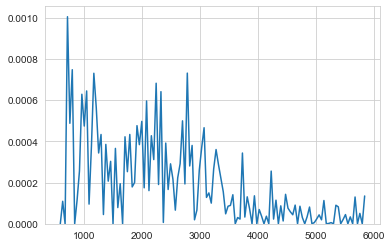

In [15]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=0.5)
plt.show()

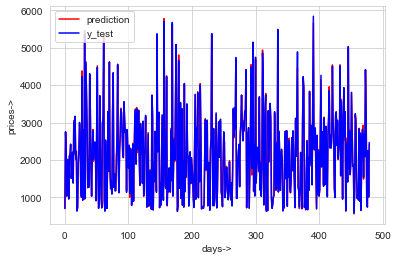

In [16]:
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()

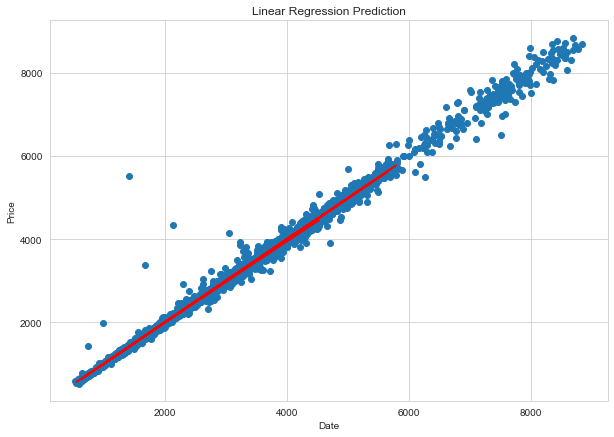

In [17]:
# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['Target'], y=df['Close Price'])
plt.plot(x_test['Close Price'], model1.predict(x_test), color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Prediction')
plt.show()

In [18]:
model1.predict(x_test)

array([ 710.27314176, 2741.81449305, 2235.76506976, 1033.6859181 ,
       1262.93532887, 2018.26230043,  963.47121346, 2125.77761165,
       2090.95016388, 2407.61851268, 1522.75118615, 1828.51780569,
       2159.30801773, 1384.49503804, 3056.76202189, 2147.14590481,
       3144.92407057, 2036.58168415, 2231.11496867,  639.81038002,
        735.72298021, 1911.75038582, 2236.87102204, 2965.71617051,
       2693.01133643, 1254.63473214, 1014.30471047, 4378.83260326,
        933.26261495, 2766.91182244,  953.71017134, 5454.89901825,
        962.28241881, 4606.97622933, 3753.97774186, 2806.37297141,
       1261.49426583, 2016.90554948, 1275.4494792 , 4266.17970031,
       3287.58421208, 1817.15861959, 1031.1777614 , 2183.84306237,
       2817.57060767, 1967.70494894, 2395.72471215, 2398.09556574,
       2435.02050158,  907.50437107, 2872.84045516, 4514.76893152,
       1744.33598294,  726.07534009, 1015.13387271, 3672.9082417 ,
       1950.43084469, 1015.68167193,  737.92288056, 2965.29827

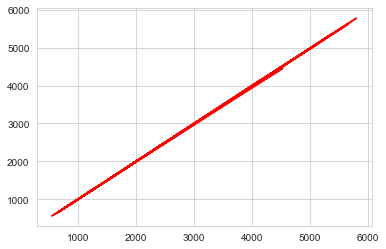

In [19]:
plt.plot(x_test['Close Price'], model1.predict(x_test), color='red')

In [20]:
model2=RandomForestRegressor(n_estimators=500)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9974302534689831

In [21]:
model1.score(x_test,y_test)

0.9979765913932998

In [22]:
def predict(m_1,m_2,data):
    p1=m_1.predict(data)
    p2=m_2.predict(data)
    return (p1+p2)/2


In [23]:
pred2=predict(model1,model2,x_test)

In [24]:
print('Mean Absolute Error',mean_absolute_error(y_test,pred2))
print('Root Mean Squared Error',mean_squared_error(y_test,pred2,squared=False))
print('Mean square Error',mean_squared_error(y_test,pred2))

Mean Absolute Error 31.524518072526114
Root Mean Squared Error 51.71761964894979
Mean square Error 2674.7121821534374


In [25]:
print('Mean Absolute Error',mean_absolute_error(y_test,model1.predict(x_test)))
print('Root Mean Squared Error',mean_squared_error(y_test,model1.predict(x_test),squared=False))
print('Mean square Error',mean_squared_error(y_test,model1.predict(x_test)))
model1.score(x_test,y_test)

Mean Absolute Error 30.441863281786006
Root Mean Squared Error 50.36821207619025
Mean square Error 2536.9567877520767


0.9979765913932998

In [26]:
print('Mean Absolute Error',mean_absolute_error(y_test,model2.predict(x_test)))
print('Root Mean Squared Error',mean_squared_error(y_test,model2.predict(x_test),squared=False))
print('Mean square Error',mean_squared_error(y_test,model2.predict(x_test)))
model2.score(x_test,y_test)

Mean Absolute Error 34.64777062499989
Root Mean Squared Error 56.76228667013913
Mean square Error 3221.9571880230546


0.9974302534689831

In [27]:
predict(model1,model2,[[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])

array([1392.79949289])

In [28]:
model1.predict([[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])

array([1387.82858578])

In [29]:
model2.predict([[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])

array([1397.7704])

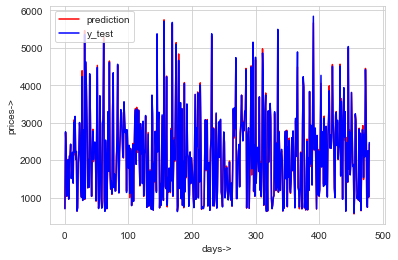

In [30]:
plt.plot(predict(model1,model2,x_test),color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()

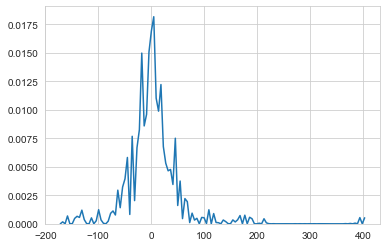

In [31]:
delta_y = y_test-pred2
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()